**Dissertation Mid Semester Implementation**



| Name       | BITS ID      | Evaluator Name | Supervisor Name |
|------------|--------------|----------------|-----------------|
| Ashwini M  | 2022DC04008  |       Prabakeran Saravanan         |      Praveen Kumar E           |


**Dissetation Topic :** A Novel Hybrid CNN-LSTM-Transformer Deep Learning Algorithm for Emotion Detection from Human Brain Waves Using Electroencephalography(EEG) with Improved Accuracy

**1. Data Acquisition**

In [5]:
from google.colab import drive
import gdown
import pandas as pd

drive.mount('/content/drive')

# Download the file from Google Drive link
file_id = "1UHl3oaxl_R08LbJcBZv6bd4arrxFhlg_"
output = "emotions.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=True)

# Load the CSV into a DataFrame
df = pd.read_csv(output)
print("Dataset acquired successfully.")
df.head()  # Display first few rows


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset acquired successfully.


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, lfilter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Verifies dataset structure and attributes
print("\nDataset Summary:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Document metadata
print("\nMetadata:")
print("Total Records:", len(df))
print("Emotion Labels:", df['label'].unique())




Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None

First 5 rows:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0 

**2.Pre-processing**

In [4]:
# 1. Handling Missing Values
print("\nHandling Missing Values:")
print("\nMissing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("\nMissing values removed. Updated data:")
print(f"Shape of the dataframe after removing missing values: {df.shape}")

# 2. Handling Duplicates
print("\nHandling Duplicates:")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df.drop_duplicates(inplace=True)
print("\nDuplicates removed. Updated data:")
print(f"Shape of the dataframe after removing duplicates: {df.shape}")

# 3. Extract the EEG signal data and the target labels
X = df.loc[:, 'fft_0_b':'fft_749_b'].values
y = df['label'].values

# 4. Label Encoding
print("\nEncoding Labels:")
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("\nLabel encoding completed.")

# 5. Split into training and testing sets
print("\nSplitting the data into training and testing sets (80% train, 20% test):")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(f"\nData Splits:")
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")



Handling Missing Values:

Missing Values:
# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

Missing values removed. Updated data:
Shape of the dataframe after removing missing values: (2132, 2549)

Handling Duplicates:
Number of duplicate rows: 0

Duplicates removed. Updated data:
Shape of the dataframe after removing duplicates: (2132, 2549)

Encoding Labels:

Label encoding completed.

Splitting the data into training and testing sets (80% train, 20% test):

Data Splits:
Training Set: (1705, 750), Test Set: (427, 750)


**4. Exploratory Data Analysis**



<ipython-input-4-1437a8547a4b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


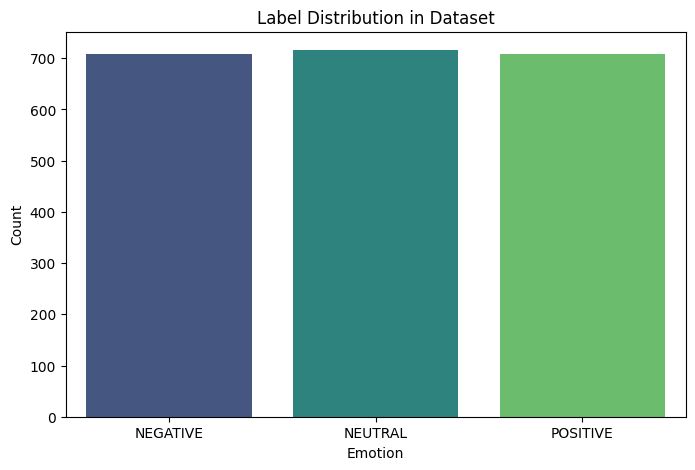

In [ ]:
# ---------------- Visualizations ----------------

# Visualize label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Label Distribution in Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()


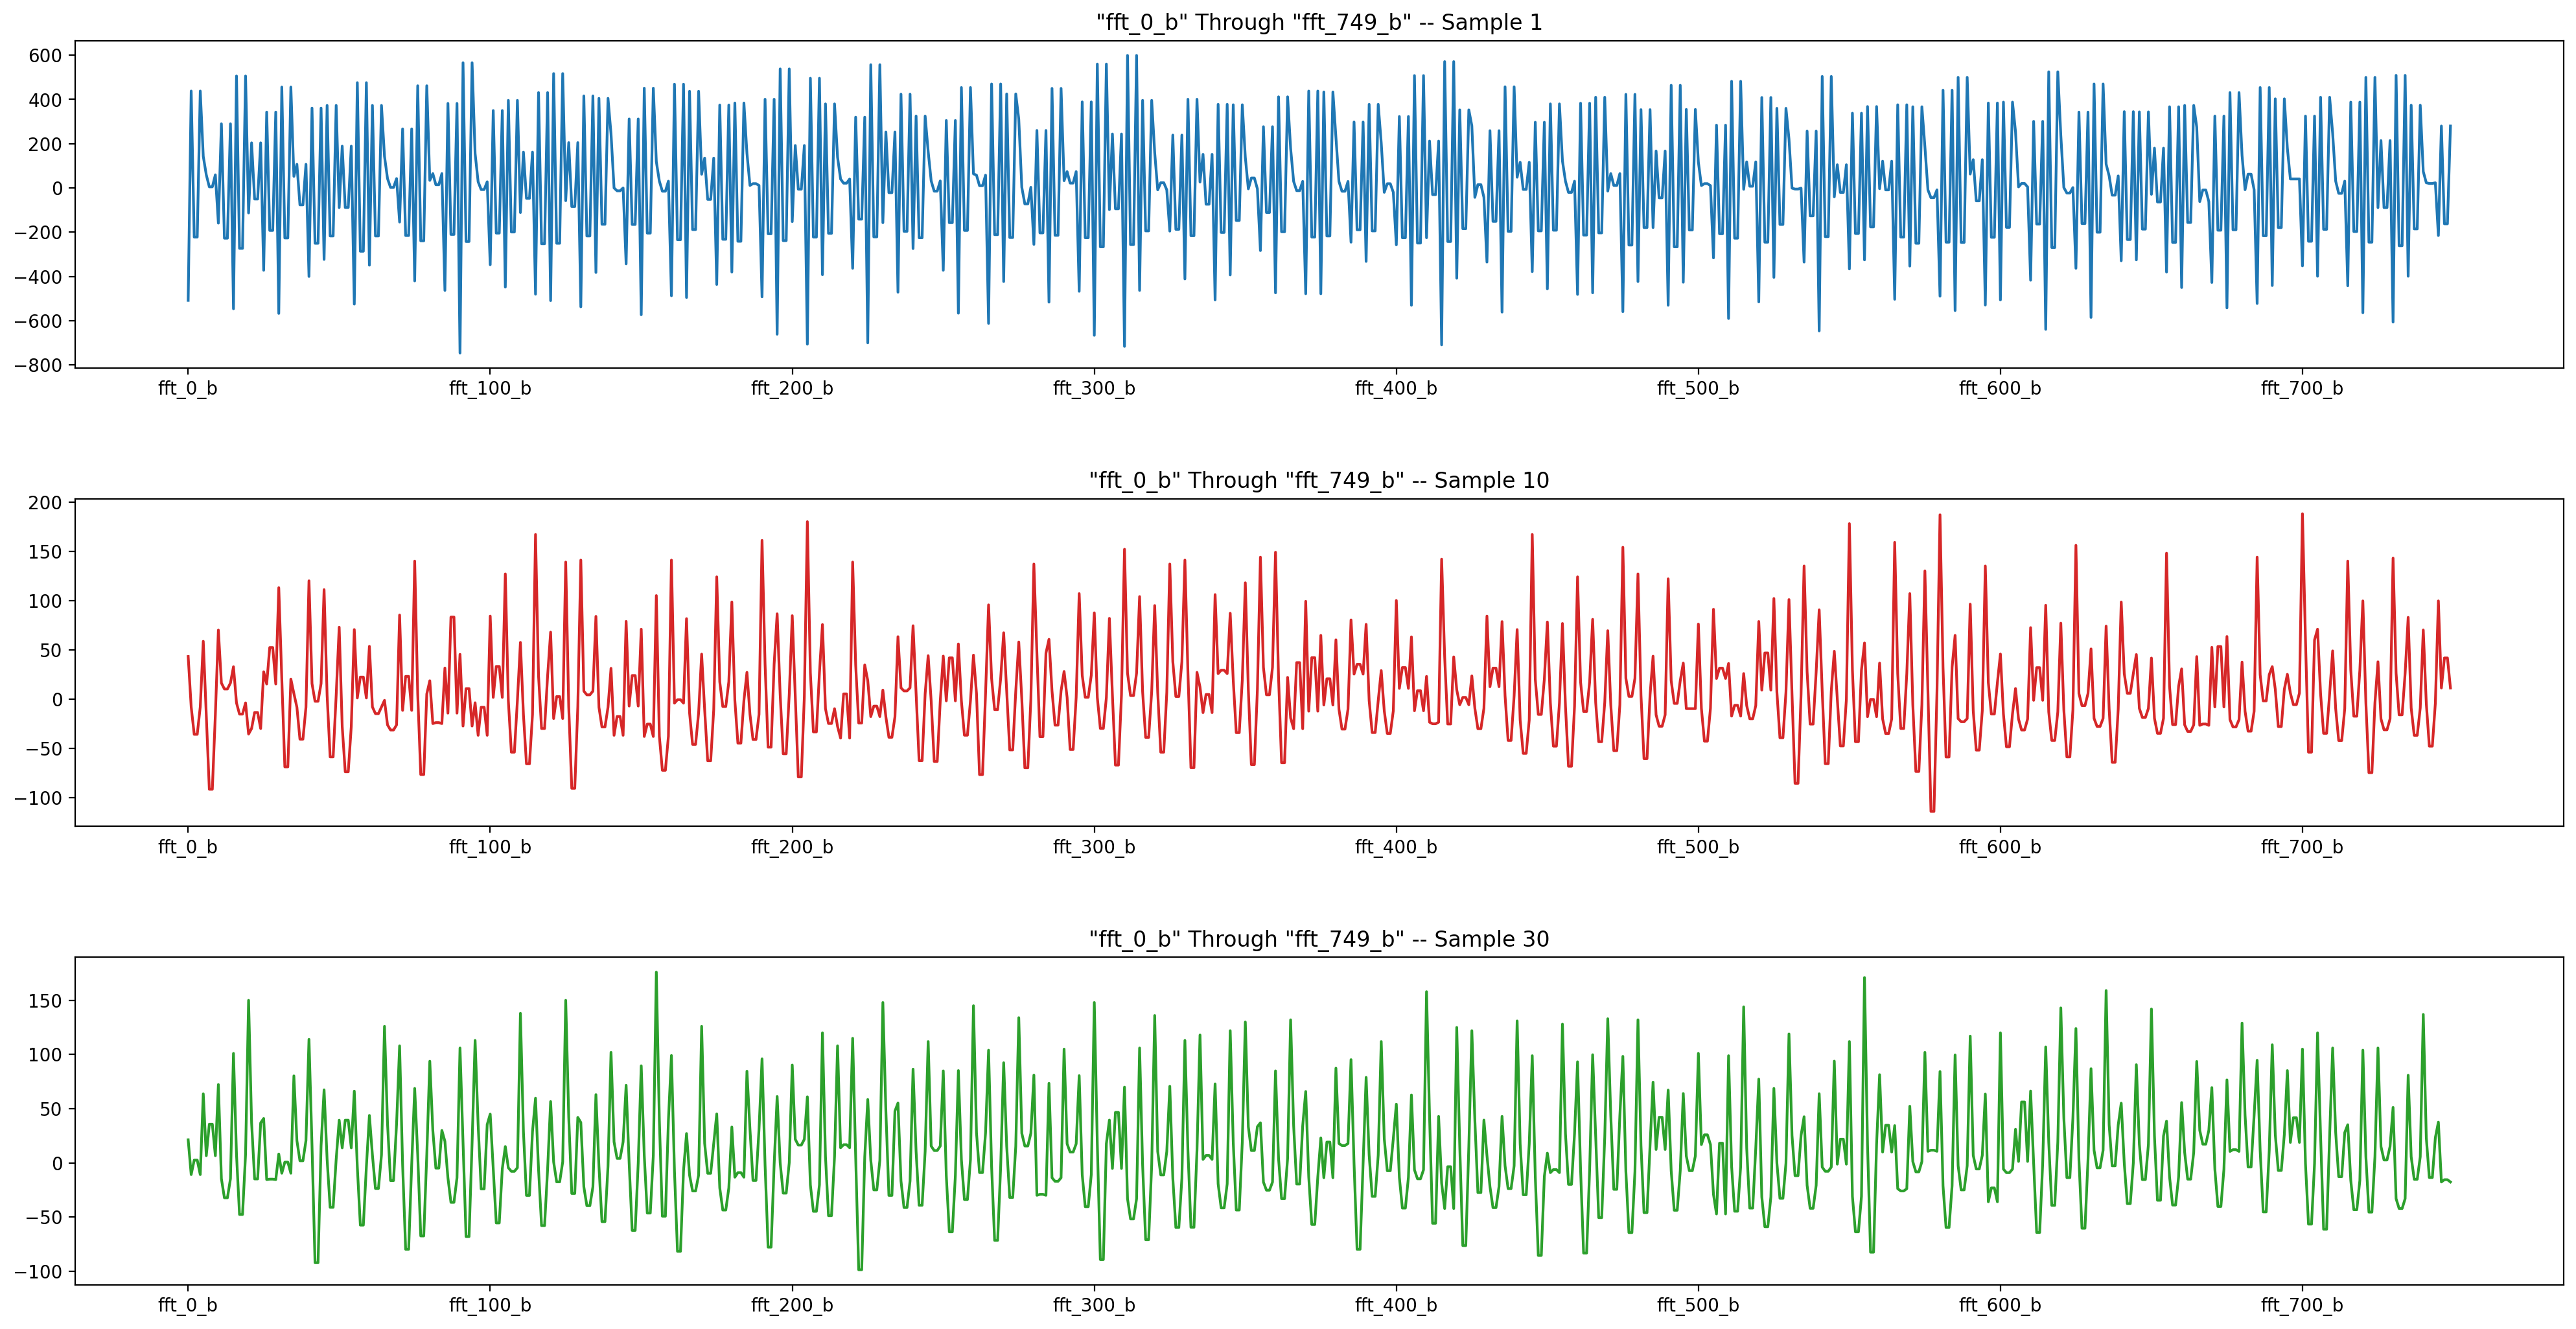

In [ ]:

# Plot FFT for different samples
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

df.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- Sample 1', color='tab:blue', ax=axes[0])
df.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- Sample 10', color='tab:red', ax=axes[1])
df.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- Sample 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()



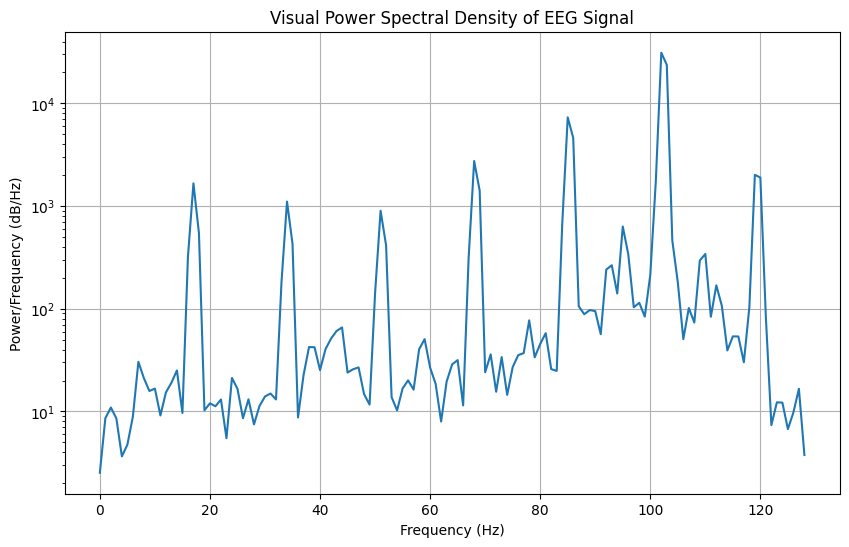

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Get sample EEG signal from the dataframe
sample = df.loc[0, 'fft_0_b':'fft_749_b'].values  # Example from row 0, columns 'fft_0_b' to 'fft_749_b'

# Define the sampling rate of your EEG data
sampling_rate = 256

# Perform Spectral Analysis using the Welch method
frequencies, power_density = signal.welch(sample, fs=sampling_rate)

# Take the absolute value of power_density to remove any complex components
power_density = np.abs(power_density)

# Plot the Power Spectral Density (PSD)
#The PSD graph helps visualize how power is distributed across different frequencies in the EEG signal.

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_density)
plt.title("Visual Power Spectral Density of EEG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.grid(True)
plt.show()


In [ ]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import time


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors (ensure labels are integers)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# ---------------- Handle Device ----------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


**5. Individual Models Development**

In [ ]:
# ---------------- Model Training and Evaluation ----------------

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=10, lr=0.001):
    model = model.to(device)
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        batch_size = 32
        for i in range(0, len(X_train), batch_size):
            inputs = X_train[i:i + batch_size]
            labels = y_train[i:i + batch_size]

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(X_train):.6f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).argmax(axis=1).cpu().numpy()
        y_true = y_test.cpu().numpy()

    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    return acc

# ---------------- Model Training ----------------
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))


**a. Training CNN Model**

In [ ]:

# ---------------- Individual Models ----------------
# 1. CNN Model
class CNN_Model(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=5, stride=1)
        self.pool = nn.MaxPool1d(2)
        self.fc = nn.Linear((input_dim - 4) // 2 * 32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Adds channel dimension for CNN
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

In [ ]:
# CNN
print("Training CNN Model...")
cnn_model = CNN_Model(input_dim, num_classes)
cnn_acc = train_and_evaluate(cnn_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)


Training CNN Model...
Epoch [1/10], Loss: 3315337397575.319824
Epoch [2/10], Loss: 5612564220317.803711
Epoch [3/10], Loss: 2393591276444.903320
Epoch [4/10], Loss: 3726421225391.521484
Epoch [5/10], Loss: 2195832316428.912598
Epoch [6/10], Loss: 3044354935079.488770
Epoch [7/10], Loss: 225995662351.615234
Epoch [8/10], Loss: 516990932910.920837
Epoch [9/10], Loss: 4636238645093.048828
Epoch [10/10], Loss: 1516418667572.551270
Accuracy: 0.5105386416861827
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       143
           1       0.00      0.00      0.00       148
           2       0.35      0.57      0.44       136

    accuracy                           0.51       427
   macro avg       0.34      0.52      0.41       427
weighted avg       0.34      0.51      0.41       427



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**b. Training LSTM Model**

In [ ]:
# 2. LSTM Model
class LSTM_Model(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=64):
        super(LSTM_Model, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Adds sequence dimension for LSTM
        _, (h_n, _) = self.lstm(x)
        x = h_n[-1]  # Uses the last hidden state
        x = self.fc(x)
        return x

In [ ]:

# LSTM
print("Training LSTM Model...")
lstm_model = LSTM_Model(input_dim, num_classes)
lstm_acc = train_and_evaluate(lstm_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)


Training LSTM Model...
Epoch [1/10], Loss: 0.032345
Epoch [2/10], Loss: 0.026950
Epoch [3/10], Loss: 0.024419
Epoch [4/10], Loss: 0.023003
Epoch [5/10], Loss: 0.022090
Epoch [6/10], Loss: 0.021447
Epoch [7/10], Loss: 0.020966
Epoch [8/10], Loss: 0.020591
Epoch [9/10], Loss: 0.020290
Epoch [10/10], Loss: 0.020042
Accuracy: 0.7377049180327869
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       143
           1       0.71      0.91      0.80       148
           2       0.73      0.32      0.45       136

    accuracy                           0.74       427
   macro avg       0.74      0.73      0.70       427
weighted avg       0.74      0.74      0.70       427



**c. Training Transformer Model**

In [ ]:
# 3. Transformer Model
class Transformer_Model(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=64):
        super(Transformer_Model, self).__init__()
        self.layernorm = nn.LayerNorm(input_dim)
        self.transformer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=4)
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.layernorm(x)
        x = x.unsqueeze(1)  # Adds sequence dimension
        x = self.transformer(x)
        x = x.mean(dim=1)  # Average pooling over sequence length
        x = self.fc(x)
        return x


In [ ]:
# Transformer
print("Training Transformer Model...")
transformer_model = Transformer_Model(input_dim, num_classes)
transformer_acc = train_and_evaluate(transformer_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)


Training Transformer Model...
Epoch [1/10], Loss: 0.044506
Epoch [2/10], Loss: 0.024534
Epoch [3/10], Loss: 0.022419
Epoch [4/10], Loss: 0.022238
Epoch [5/10], Loss: 0.022616
Epoch [6/10], Loss: 0.022084
Epoch [7/10], Loss: 0.022087
Epoch [8/10], Loss: 0.023361
Epoch [9/10], Loss: 0.022091
Epoch [10/10], Loss: 0.021627
Accuracy: 0.7306791569086651
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       143
           1       0.68      0.88      0.77       148
           2       0.68      0.32      0.43       136

    accuracy                           0.73       427
   macro avg       0.72      0.72      0.69       427
weighted avg       0.72      0.73      0.70       427



**Hybrid Model Development**

In [ ]:
# ---------------- Hybrid Model ----------------
class CNN_LSTM_Transformer(nn.Module):
    def __init__(self, input_dim, num_classes, cnn_out_channels=32, lstm_hidden_dim=64, transformer_dim=128):
        super(CNN_LSTM_Transformer, self).__init__()
        # CNN Block
        self.conv1 = nn.Conv1d(1, cnn_out_channels, kernel_size=5, stride=1)
        self.pool = nn.MaxPool1d(2)
        # LSTM Block
        self.lstm = nn.LSTM(input_size=cnn_out_channels, hidden_size=lstm_hidden_dim, batch_first=True)
        # Transformer Block
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=lstm_hidden_dim, nhead=4)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_layer, num_layers=2)
        # MLP Classifier
        self.fc = nn.Linear(lstm_hidden_dim, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension for CNN
        x = self.pool(torch.relu(self.conv1(x)))  # CNN Block
        x = x.permute(0, 2, 1)  # Reshape for LSTM
        x, _ = self.lstm(x)  # LSTM Block
        x = self.transformer_encoder(x)  # Transformer Block
        x = x[:, -1, :]  # Take the last output
        x = self.fc(x)
        return x

**Training CNN-LSTM-Transformer Hybrid Model**

In [ ]:
# Hybrid Model
print("Training CNN-LSTM-Transformer Hybrid Model...")
hybrid_model = CNN_LSTM_Transformer(input_dim, num_classes)
hybrid_acc = train_and_evaluate(hybrid_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)


Training CNN-LSTM-Transformer Hybrid Model...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [1/10], Loss: 0.016055
Epoch [2/10], Loss: 0.010764
Epoch [3/10], Loss: 0.010294
Epoch [4/10], Loss: 0.010024
Epoch [5/10], Loss: 0.009503
Epoch [6/10], Loss: 0.009452
Epoch [7/10], Loss: 0.008976
Epoch [8/10], Loss: 0.009073
Epoch [9/10], Loss: 0.009240
Epoch [10/10], Loss: 0.008938
Accuracy: 0.8992974238875878
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       143
           1       0.98      0.98      0.98       148
           2       0.95      0.72      0.82       136

    accuracy                           0.90       427
   macro avg       0.91      0.90      0.89       427
weighted avg       0.91      0.90      0.90       427



**Results**

In [ ]:

# ---------------- Final Results ----------------
print("Final Comparison of Models:")
print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"LSTM Accuracy: {lstm_acc:.4f}")
print(f"Transformer Accuracy: {transformer_acc:.4f}")
print(f"Hybrid CNN-LSTM-Transformer Accuracy: {hybrid_acc:.4f}")

Final Comparison of Models:
CNN Accuracy: 0.5105
LSTM Accuracy: 0.7377
Transformer Accuracy: 0.7307
Hybrid CNN-LSTM-Transformer Accuracy: 0.8993
